In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("car.data", names =['buying','maint','doors','persons','lug_boot','safety','nothing'])
df

,buying,maint,doors,persons,lug_boot,safety,nothing
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
df = df.drop('nothing',axis=1)
df

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [13]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


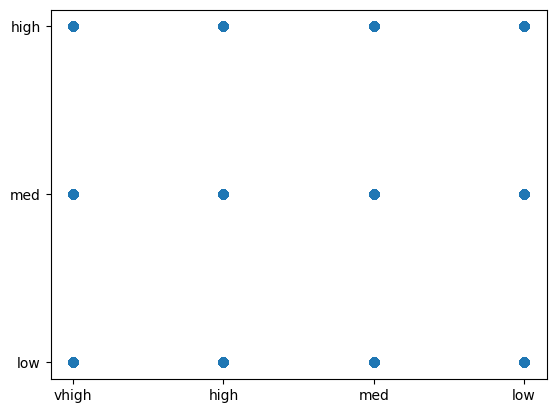

In [6]:
x = df['maint']
y = df['safety']
plt.scatter(x,y)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [18]:
dummies = pd.get_dummies(df[['safety','buying','maint']])
dummies.head()

,safety_high,safety_low,safety_med,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh
0,False,True,False,False,False,False,True,False,False,False,True
1,False,False,True,False,False,False,True,False,False,False,True
2,True,False,False,False,False,False,True,False,False,False,True
3,False,True,False,False,False,False,True,False,False,False,True
4,False,False,True,False,False,False,True,False,False,False,True


In [38]:
rem = ['safety_high','safety_low','safety_med']
X = dummies[rem]
Y = dummies.drop(rem,axis=1)
print(X)

print(Y)


      safety_high  safety_low  safety_med
0           False        True       False
1           False       False        True
2            True       False       False
3           False        True       False
4           False       False        True
...           ...         ...         ...
1723        False       False        True
1724         True       False       False
1725        False        True       False
1726        False       False        True
1727         True       False       False

[1728 rows x 3 columns]
      buying_high  buying_low  buying_med  buying_vhigh  maint_high  \
0           False       False       False          True       False   
1           False       False       False          True       False   
2           False       False       False          True       False   
3           False       False       False          True       False   
4           False       False       False          True       False   
...           ...         ...         ...    

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=50,test_size=.25,shuffle=True)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(y_train,x_train)


KNeighborsClassifier()

In [42]:
model.score(y_test,x_test)

0.1736111111111111

In [45]:
from sklearn import metrics
x_pred = model.predict(y_test)
print("Accuracy : ",metrics.accuracy_score(x_test,x_pred))

Accuracy :  0.1736111111111111
